Uvozimo potrebne knjižnice za manipulacijo s podatki:

In [22]:
import random
import math
import matplotlib.pylab as plt

Izbereva poljubne točke znotraj kroga s polmerom r, s središčem v točki (0,0)

In [43]:
def kvadrat_tock_krog(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        r = random.uniform(0,1/sqrt(math.pi))
        alpha = 2 * math.pi * random.random()
        x = r * math.cos(alpha)
        y = r * math.sin(alpha)
        slovar_tock['tocka_' + str(i)] = (x,y)
    return slovar_tock
sl = kvadrat_tock_krog(8)

Razdalje med točkami izračunamo s pomočjo Pitagorovega izreka.

In [44]:
def razdalje_krog(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = abs(slovar[key1][0] - slovar[key2][0])
            delta_y = abs(slovar[key1][1] - slovar[key2][1])
            razdalja = sqrt(delta_x^2 + delta_y^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)
razdalje_krog(sl)

{'tocka_0': [('tocka_1', 1.0283860442219368),
  ('tocka_2', 0.8352346717628771),
  ('tocka_3', 0.32295540171297243),
  ('tocka_4', 0.8336319321851734),
  ('tocka_5', 0.3896928364981777),
  ('tocka_6', 0.4388872730399203),
  ('tocka_7', 0.739060950383317)],
 'tocka_1': [('tocka_0', 1.0283860442219368),
  ('tocka_2', 0.28492416175269575),
  ('tocka_3', 0.716602443179222),
  ('tocka_4', 0.196919897363939),
  ('tocka_5', 0.7180968949518807),
  ('tocka_6', 1.0649205731401596),
  ('tocka_7', 0.43622775575062145)],
 'tocka_2': [('tocka_0', 0.8352346717628771),
  ('tocka_1', 0.28492416175269575),
  ('tocka_3', 0.5122934688724816),
  ('tocka_4', 0.1624928157674811),
  ('tocka_5', 0.4766507112601853),
  ('tocka_6', 0.7969009550886499),
  ('tocka_7', 0.4765711579146138)],
 'tocka_3': [('tocka_0', 0.32295540171297243),
  ('tocka_1', 0.716602443179222),
  ('tocka_2', 0.5122934688724816),
  ('tocka_4', 0.5198527525517694),
  ('tocka_5', 0.12686940811164982),
  ('tocka_6', 0.4474421850225398),
  ('to

Posamezna razdalja nam predstavlja preferenco (manjša kot je razdalja, večja je preferenca). Le te uredimo po velikosti, od najmanjše do največje, za vsako točko:

In [45]:
def preference_krog(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)
preference_krog(razdalje_krog(sl))

{'tocka_0': [('tocka_3', 0.32295540171297243),
  ('tocka_5', 0.3896928364981777),
  ('tocka_6', 0.4388872730399203),
  ('tocka_7', 0.739060950383317),
  ('tocka_4', 0.8336319321851734),
  ('tocka_2', 0.8352346717628771),
  ('tocka_1', 1.0283860442219368)],
 'tocka_1': [('tocka_4', 0.196919897363939),
  ('tocka_2', 0.28492416175269575),
  ('tocka_7', 0.43622775575062145),
  ('tocka_3', 0.716602443179222),
  ('tocka_5', 0.7180968949518807),
  ('tocka_0', 1.0283860442219368),
  ('tocka_6', 1.0649205731401596)],
 'tocka_2': [('tocka_4', 0.1624928157674811),
  ('tocka_1', 0.28492416175269575),
  ('tocka_7', 0.4765711579146138),
  ('tocka_5', 0.4766507112601853),
  ('tocka_3', 0.5122934688724816),
  ('tocka_6', 0.7969009550886499),
  ('tocka_0', 0.8352346717628771)],
 'tocka_3': [('tocka_5', 0.12686940811164982),
  ('tocka_0', 0.32295540171297243),
  ('tocka_6', 0.4474421850225398),
  ('tocka_7', 0.5053796027409476),
  ('tocka_2', 0.5122934688724816),
  ('tocka_4', 0.5198527525517694),
  ('t

Algoritem je sestavljen iz dveh funkcij:
1) funkcija "Najkrajsa"  pregleda razdalje med točkami. Ko najde najmanjšo razdaljo izmed vseh, izbere tisti dve točki, med katerima ta razdalja nastopi in ju poveže v par. Na koncu nam vrne par točk, s pripadajočo najmanjšo razdaljo.

In [47]:
def Najkrajsa_krog(slovar):
    min_razdalja = 2*(1/sqrt(math.pi))
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)
Najkrajsa_krog(preference_krog(razdalje_krog(sl)))

(['tocka_5', 'tocka_3'], 0.12686940811164982)

2) funkcija "Vsi_pari" nam omogoči, da se čez 1. funckijo zapeljemo tolikokrat kolikokrat je potrebno in povežemo vse točke v pare. Na koncu nam vrne seznam vseh parov.

In [50]:
def Vsi_pari_krog(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa_krog(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)
Vsi_pari_krog(preference_krog(razdalje_krog(sl)))

[['tocka_5', 'tocka_3'],
 ['tocka_4', 'tocka_2'],
 ['tocka_7', 'tocka_1'],
 ['tocka_6', 'tocka_0']]

S funkcijo "vsota_razdalj" izračunamo seštevek vseh razdalj med točkami, ki so skupaj v paru:

In [28]:
def vsota_razdalj_krog(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

Na koncu pa še s pomočjo sledeče funkcije analiziramo, kako se obnaša naša vsota razdalj, ko povečujemo število točk.

In [29]:
def kvadrat_tock(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        slovar_tock['tocka_' + str(i)] = (x,y)
    return slovar_tock

In [30]:
def razdalje(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = slovar[key1][0] - slovar[key2][0]
            delta_y = slovar[key1][1] - slovar[key2][1]
            razdalja = sqrt(delta_x^2 + delta_y^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)


In [31]:
def preference(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)

In [32]:
def Najkrajsa(slovar):
    min_razdalja = sqrt(2)
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)

In [33]:
def Vsi_pari(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

In [34]:
def vsota_razdalj(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

In [35]:
def razlicne_vsote(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj(preference(razdalje(kvadrat_tock(i))),Vsi_pari(preference(razdalje(kvadrat_tock(i)))))
    return(slovar_vsote)

In [36]:
def razlicne_vsote_krog(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj_krog(preference_krog(razdalje_krog(kvadrat_tock_krog(i))),Vsi_pari_krog(preference_krog(razdalje_krog(kvadrat_tock_krog(i)))))
    return(slovar_vsote)

In [37]:
def povprecje_kvadrat(zacetek, konec, korak, ponovitve):
    povprecje = {}
    if ponovitve == 0:
        return povprecje
    base_slovar = razlicne_vsote(zacetek, konec, korak)
    
    """zgeneriramo slovar tolikokrat kolikotr hocenmo ponovitev - 1 (base_slovar je prva ponovitev), 
    vsote pristecvamo v base slovar in koncen rezultat delimo s
    stevilom ponovitev da dobimo povprecje"""
    
    for x in range(ponovitve - 1):
        slovar = razlicne_vsote(zacetek, konec, korak)
        for key, value in slovar.items():
            base_slovar[key] += value
    for key, value in base_slovar.items():
        povprecje[key] = value / ponovitve
    return povprecje

In [38]:
def povprecje_krog(zacetek, konec, korak, ponovitve):
    povprecje = {}
    if ponovitve == 0:
        return povprecje
    base_slovar = razlicne_vsote_krog(zacetek, konec, korak)
    
    """zgeneriramo slovar tolikokrat kolikotr hocenmo ponovitev - 1 (base_slovar je prva ponovitev), 
    vsote pristecvamo v base slovar in koncen rezultat delimo s
    stevilom ponovitev da dobimo povprecje"""
    
    for x in range(ponovitve - 1):
        slovar = razlicne_vsote_krog(zacetek, konec, korak)
        for key, value in slovar.items():
            base_slovar[key] += value
    for key, value in base_slovar.items():
        povprecje[key] = value / ponovitve
    return povprecje

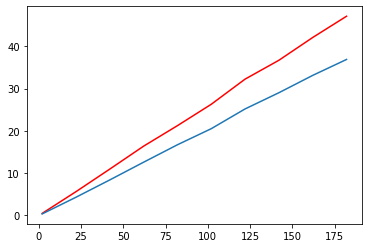

In [52]:
#slovar = razlicne_vsote(0,1000,50)
#plt.plot(*zip(*sorted(slovar.items())),'r')

kvadrat = povprecje_kvadrat(2, 200 ,20, 30)
krog = povprecje_krog(2, 200 ,20, 30)

plt.plot(*zip(*sorted(kvadrat.items())),'r')

#slovar_krog = razlicne_vsote_krog(0,1000,50)
#plt.plot(*zip(*sorted(slovar_krog.items())))
plt.plot(*zip(*sorted(krog.items())))

plt.show()

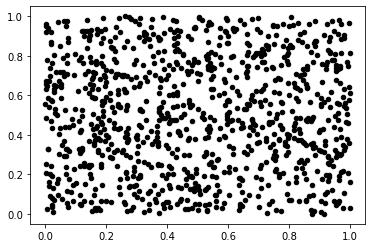

In [40]:
def tocke(st_tock):
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        plt.plot(x,y,'ko',markersize=4.5)
    return(plt.show())

tocke(1000)